In [7]:
import csv
import shapefile
import shapely.geometry as geom
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl

import math
import numpy as np
from numpy import linalg as la
import statistics as stat

import ternary
from ternary.helpers import simplex_iterator

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


ImportError: No module named 'ternary'

In [8]:
COUNTY_RESULTS = {}
with open("PA/PA_COUNTY_RESULTS.csv",'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        COUNTY_RESULTS[row["County"].capitalize()] = row
print(COUNTY_RESULTS['Allegheny'])

{'CASTLE, DARRELL L': '1793', 'County': 'ALLEGHENY', 'STEIN, JILL': '5021', 'TRUMP, DONALD J': '257488', 'CLINTON, HILLARY': '363017', 'JOHNSON, GARY E': '15854'}


In [9]:
CLINTON = 'CLINTON, HILLARY'
TRUMP = 'TRUMP, DONALD J'

In [15]:
sf = shapefile.Reader("PA/tl_2011_us_county/tl_2011_us_county")
COUNTY_SHAPES = {}
iter = sf.iterShapeRecords()
for i in iter:
    if i.record[0] == '42':
        s = geom.shape(i.shape)
        COUNTY_SHAPES[i.record[4].capitalize()]=s
        print(i.record[4].capitalize(),s.area)
        
print(len(COUNTY_SHAPES.keys()))

Bedford 0.2778023017424993
Chester 0.20731073095649993
Franklin 0.21088175593549954
Cambria 0.19084105490799994
Northampton 0.10423079240700017
Luzerne 0.2518803957820011
Bucks 0.17070188674800002
Wayne 0.21011809793550035
Berks 0.23792197862100037
Allegheny 0.20476269397749983
Adams 0.14226700417450008
Pike 0.15791437560100013
Juniata 0.10832559822649993
Snyder 0.09158199739350019
Lawrence 0.10053001316099994
Crawford 0.29058839809149895
Schuylkill 0.2160463689145005
Lebanon 0.09954808844949982
Armstrong 0.18350101276599956
Potter 0.3031990575355015
Fayette 0.21781324123849927
Blair 0.14498322223000012
Lycoming 0.3465708768044997
Columbia 0.13596921778550008
Tioga 0.3188705490709992
York 0.24848466242400044
Delaware 0.0520024915775002
Beaver 0.12250744918049988
Susquehanna 0.23355669067800028
Monroe 0.17122130137950037
Huntingdon 0.24438581412599983
Sullivan 0.1262751386230002
Clarion 0.16953474186499964
Clearfield 0.31987516486
Westmoreland 0.28428960176999896
Mercer 0.19007634860249

In [16]:
VOTERS = {}
with open("PA/pa_registerd_voters_county.csv",'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        VOTERS[row["County"].capitalize()] = row
VOTERS['Allegheny']

{'ALL': '924573',
 'County': 'ALLEGHENY',
 'DEM': '539866',
 'ID#': '2291',
 'NOF': '72740',
 'OTH': '52444',
 'REP': '259523'}

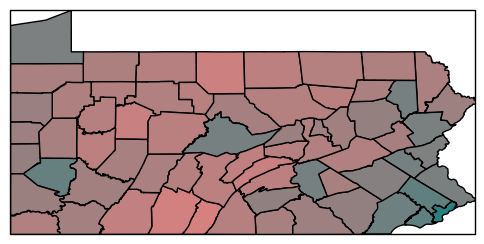

In [18]:
ax = plt.axes(projection=ccrs.PlateCarree())

counties = []
names = []
for k,v in COUNTY_SHAPES.items():
    meta = dict(COUNTY_RESULTS[k])
    del meta["County"]
    total = sum([int(f) for f in meta.values()])
    color = (int(meta["TRUMP, DONALD J"])/total,0.5,0.5)
    #print(k, total, meta["TRUMP, DONALD J"], color)
    counties.append(v)
    names.append(k)
    cf = cfeature.ShapelyFeature([v], ccrs.PlateCarree())
    ax.add_feature(cf, facecolor=color)

    
ax.set_extent([-80.5198510000000027,-74.7215190000000007,39.7211469999999949,42.5160720000000012])
ax.set_aspect(1)

plt.show()

28281236.1447 27698.6789508


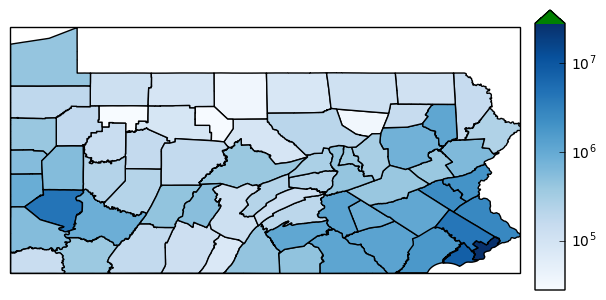

In [48]:
fig = plt.figure()#figsize=(8, 3))
ax = fig.add_axes([0.05, 0.05, 0.85, 0.9], projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.925, 0.15, 0.05, 0.7])

# ax = plt.axes(projection=ccrs.PlateCarree())
colormap = cm.get_cmap("Blues")
colormap.set_bad('orange')
colormap.set_over('g')
colormap.set_under('k')

norm = colors.LogNorm()

to_plot = []
for county,v in COUNTY_SHAPES.items():
    vap = int(dict(VOTERS[county])["ALL"])
    value = vap/v.area
    to_plot.append((county, v, value))

norm.autoscale_None([k[2] for k in to_plot])
print(norm.vmax, norm.vmin)

sm = cm.ScalarMappable(norm=norm, cmap=colormap)

for (county, shape, value) in to_plot:
    color = sm.to_rgba(value)
#     print("sm:", k,sm.to_rgba(value), color)
    cf = cfeature.ShapelyFeature([shape], ccrs.PlateCarree())
    ax.add_feature(cf, facecolor=color)

ax.set_extent([-80.5198510000000027,-74.7215190000000007,39.7211469999999949,42.5160720000000012])
ax.set_aspect(1)

cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=colormap, norm=norm, extend='max')

plt.show()

Fayette 1.0167548500881833
Greene 1.0702224052718288
Cambria 1.069633229554256


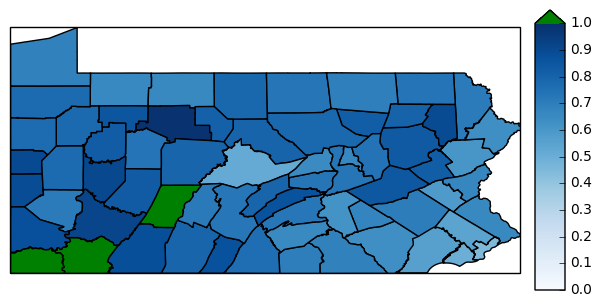

In [71]:
fig = plt.figure()#figsize=(8, 3))
ax = fig.add_axes([0.05, 0.05, 0.85, 0.9], projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.925, 0.15, 0.05, 0.7])

# ax = plt.axes(projection=ccrs.PlateCarree())
colormap = cm.get_cmap("Blues")
colormap.set_bad('orange')
colormap.set_over('g')
colormap.set_under('k')

# values = []
# for county,v in COUNTY_RESULTS.items():
#     meta = dict(COUNTY_RESULTS[k])
#     del meta["County"]
#     total = sum([int(f) for f in meta.values()])
#     vap = int(dict(VOTERS[k])["ALL"])
#     value = int(meta["TRUMP, DONALD J"])/sum([int(VOTERS[k]["REP"]), int(VOTERS[k]["OTH"]), int(VOTERS[k]["NOF"])])

for k,v in COUNTY_SHAPES.items():
    meta = dict(COUNTY_RESULTS[k])
    del meta["County"]
    total = sum([int(f) for f in meta.values()])
    clinton = int(meta["CLINTON, HILLARY"])
    trump = int(meta["TRUMP, DONALD J"])

    vap = int(dict(VOTERS[k])["ALL"])
#     color = total/vap
#     value = int(meta["CLINTON, HILLARY"])/int(VOTERS[k]["DEM"])
#     value = int(meta["TRUMP, DONALD J"])/int(VOTERS[k]["REP"])
#     value = int(meta["TRUMP, DONALD J"])/sum([int(VOTERS[k]["REP"]), int(VOTERS[k]["OTH"]), int(VOTERS[k]["NOF"])])
    value = trump/(sum([int(VOTERS[k]["REP"]), int(VOTERS[k]["OTH"]), int(VOTERS[k]["NOF"])])-(total-trump-clinton))
    color = colormap(value)
    if value > 1:
        print(k, value)
    cf = cfeature.ShapelyFeature([v], ccrs.PlateCarree())
    ax.add_feature(cf, facecolor=color)

ax.set_extent([-80.5198510000000027,-74.7215190000000007,39.7211469999999949,42.5160720000000012])
ax.set_aspect(1)

cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=colormap, norm=colors.Normalize(vmin=0, vmax=1), extend='max')

plt.show()

17.7286211769 -61.2447346466


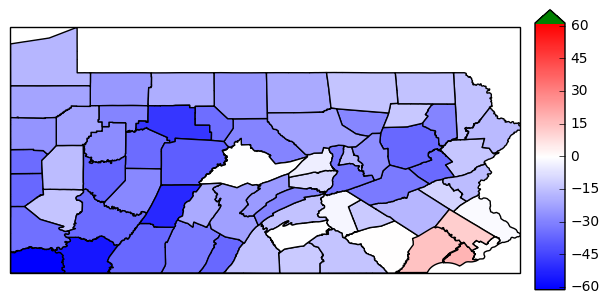

In [87]:
fig = plt.figure()#figsize=(8, 3))
ax = fig.add_axes([0.05, 0.05, 0.85, 0.9], projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.925, 0.15, 0.05, 0.7])

# ax = plt.axes(projection=ccrs.PlateCarree())
colormap = cm.get_cmap("bwr")
colormap.set_bad('orange')
colormap.set_over('g')
colormap.set_under('k')

norm = colors.Normalize()

to_plot = []
for county,v in COUNTY_SHAPES.items():
    meta = dict(COUNTY_RESULTS[county])
    del meta["County"]
    total = sum([int(f) for f in meta.values()])
    clinton = int(meta["CLINTON, HILLARY"])
    trump = int(meta["TRUMP, DONALD J"])

    vap = int(dict(VOTERS[county])["ALL"])
    
    republicans = int(dict(VOTERS[county])["REP"])/vap*100
    democrats = int(dict(VOTERS[county])["DEM"])/vap*100
    value = ((clinton-trump)/total*100)-(democrats-republicans)
    to_plot.append((county, v, value))

norm.autoscale_None([k[2] for k in to_plot])
print(norm.vmax, norm.vmin)
m = max(abs(norm.vmax), abs(norm.vmin))
norm = colors.Normalize(vmin=-m, vmax=m)

sm = cm.ScalarMappable(norm=norm, cmap=colormap)

for (county, shape, value) in to_plot:
    color = sm.to_rgba(value)
#     print("sm:", k,sm.to_rgba(value), color)
    cf = cfeature.ShapelyFeature([shape], ccrs.PlateCarree())
    ax.add_feature(cf, facecolor=color)

ax.set_extent([-80.5198510000000027,-74.7215190000000007,39.7211469999999949,42.5160720000000012])
ax.set_aspect(1)

cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=colormap, norm=norm, extend='max')

plt.show()

[-10.076509969761412, -38.34465780930415, -31.702141681479475, 0.041017506783038726, -12.646078696844043, -13.0328907316615, -16.556037697906625, -36.286241897730044, -14.772136673844969, -35.28682293959034, -22.20223180779654, -14.595523691939029, -28.793889831136823, -36.16644336895717, -25.351058544350344, -17.66600024874395, -13.913787700581715, -13.462331497705785, 0.9356092683468944, -16.503523713288835, -9.985612893895485, -2.3513148672087176, -22.74822568633429, -36.058065337058466, -20.23859938797255, 17.728621176865914, -15.928849899950748, -0.45707988527535726, -14.65942879640189, -21.979040723239798, -29.25461422753314, -19.600853404989355, -27.074115340925296, -34.4458130945675, -27.28960402086992, -36.29158399966531, -28.41800085729795, -31.760982395881598, -21.8906931838133, -17.407216559992822, -24.232672519846517, -55.616510549202616, -48.015300498499585, 14.461174468789737, -14.119031035119361, -29.653798492336715, -51.582096881624196, -29.54320735106735, -61.24473464

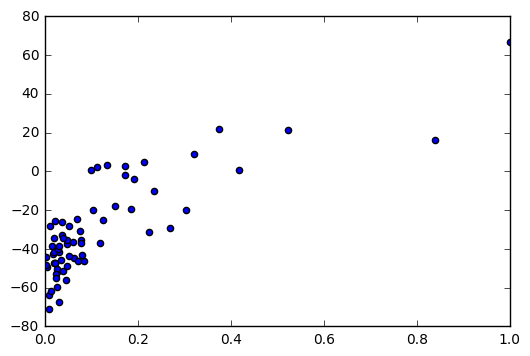

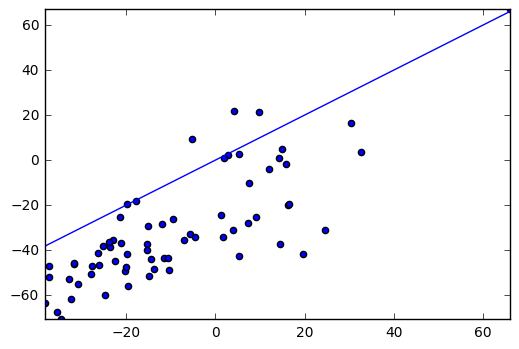

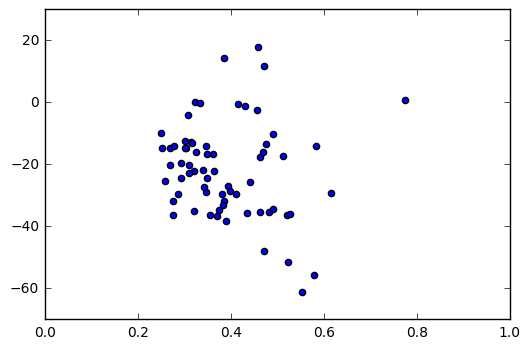

In [88]:
x=[]
clintons = []
trumps=[]
counties = COUNTY_RESULTS.keys()
vap=[int(dict(VOTERS[c])["ALL"]) for c in counties]
vap = [i/max(vap) for i in vap]

for county in COUNTY_RESULTS.keys():
    meta = dict(COUNTY_RESULTS[county])
    del meta["County"]
    total = sum([int(f) for f in meta.values()])
    clinton = int(meta["CLINTON, HILLARY"])
    trump = int(meta["TRUMP, DONALD J"])
    x.append((clinton-trump)/total*100)
    trumps.append(trump/total*100)
    clintons.append(clinton/total*100)
#     x.append((total-clinton-trump)/total*100)
plt.figure()
plt.scatter(vap,x)
plt.xlim([0,1])

republicans = [int(dict(VOTERS[c])["REP"])/int(dict(VOTERS[c])["ALL"]) for c in counties]
democrats = [int(dict(VOTERS[c])["DEM"])/int(dict(VOTERS[c])["ALL"]) for c in counties]
x_v = [(i-j)*100 for i,j in zip(democrats,republicans)]
plt.figure()
plt.scatter(x_v, x)
print([i-j for i,j in zip(x, x_v)])
plt.plot([-100,100],[-100,100])
plt.xlim([min(x_v),max(x_v)])
plt.ylim([min(x),max(x)])
# plt.xlim([0,1])
plt.figure()
plt.scatter(democrats,[i-j for i,j in zip(x,x_v)])
plt.xlim([0,1])
# plt.figure()
# plt.scatter(vap,democrats)
# plt.xlim([0,1])
plt.show()


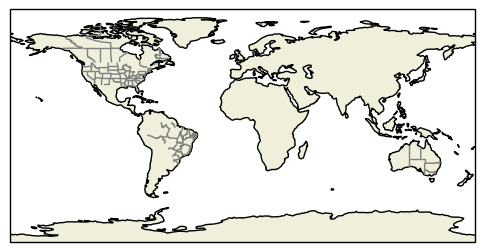

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText


ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([80, 170, -45, 30])

# Put a background image on for nice sea rendering.
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')

# Add a text annotation for the license information to the
# the bottom right corner.
text = AnchoredText(r'$\mathcircled{{c}}$ {}; license: {}'
                    ''.format(SOURCE, LICENSE),
                    loc=4, prop={'size': 12}, frameon=True)
# ax.add_artist(text)

plt.show()

In [22]:
def plot_cmap(cmap, vmax=100, filter=lambda x,y: x+y <= 100, foo=1):
    n=(vmax+1)//foo
    xs = np.linspace(0, vmax, n)
    xv, yv = np.meshgrid(xs, xs)
    colors = np.zeros([n,n]).tolist()
    grid = np.dstack((xv, yv))
    ps = []
    for i in range(n):
        for j in range(n):
            x,y = (xv[j,i], yv[j,i])
            if filter(x,y):
                res = cmap((x,y))
                if res is None or np.any(np.isnan(res)):
                    res = (0,0,0)
                if np.any(np.isnan(res)):
                    print((x,y), res)
                colors[j][i] = res
            else:
                colors[j][i] = (0,0,0)
#     print(colors)
    plt.imshow(colors, origin='lower')
    plt.show()

In [24]:
t = np.dtype([('x', float), ('y', float)])
a = np.array([(1,2), (3,4)], dtype=t)
a[1]['x']

3.0

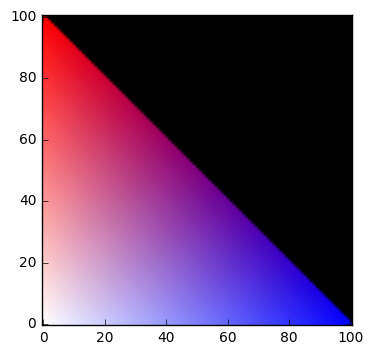

In [26]:
# generate corners of regular n-poly centered at 0,0
def poly_corners(n):
    step = 2*math.pi/n
    return np.array([[math.cos(step*i), math.sin(step*i)] for i in range(n)])

def regular_simplex(n):
    # TODO: implement general approach to compute regular n-simplex
    # https://en.wikipedia.org/wiki/Simplex#Cartesian_coordinates_for_regular_n-dimensional_simplex_in_Rn
    if n==3: return poly_corners(3)
    if n==4: return np.array([
                [1,0,0],
                [-1/3,math.sqrt(8)/3,0],
                [-1/3,-math.sqrt(2)/3,math.sqrt(2/3)],
                [-1/3,-math.sqrt(2)/3,-math.sqrt(2/3)]
                             ])
    if n==5: return np.array([
                [1,0,0,0],
                [-1/4,math.sqrt(15)/4,0,0],
                [-1/4,-math.sqrt(15)/12,math.sqrt(10/12),0],
                [-1/4,-math.sqrt(15)/12,-math.sqrt(30)/12,-math.sqrt(10)/4],
                [-1/4,-math.sqrt(15)/12,-math.sqrt(30)/12,math.sqrt(10)/4]
                             ])

def homogenize(points, out_dim):
    n = len(points)
    res = np.array(points)
    in_dim = len(points[0])
    if in_dim < out_dim:
        res = np.concatenate((res, np.zeros((n,out_dim-in_dim))), axis=1)
    return np.concatenate((res,np.ones((n,1))), axis=1)

def project(a,b):
    a_ = np.array(a)
    b_ = np.array(b)
    return np.dot(a_.T,b_)/np.dot(a_.T,a_)*a_

def gen_cmap(points, colors, lower=0):
    n = len(points)
    a = homogenize(points,n-1)
    b = regular_simplex(n)
#     b = poly_corners(n)
#     print(n,a,b)
#     x = la.solve(a,b)
    x = la.lstsq(a,b)[0]
#     print(x, np.dot(a,x), b)
#     max_dist = la.norm(b[0]-b[1])
    max_dist = la.norm(project(-b[0], b[1]-b[0]))
#     print(max_dist)
    def cmap(ps):
        if len(np.array(ps).shape) == 1:
            ps = [ps]
        a = homogenize(ps,n-1)
#         print(a, x)
        nps = np.dot(a,x)
#         print(nps)
#         distances = [[max(max_dist-la.norm(p-c),0) for c in b] for p in nps]
        distances = [[max(max_dist-la.norm(project(-c, p-c)), 0) for c in b] for p in nps]
        norm_dist = [np.array(k)/sum(k) for k in distances]
        out = np.dot(norm_dist, colors).clip(min=0.0, max=1.0)
#         print(ps, nps.tolist(), distances, out)
        return out.tolist()[0]
    return cmap

# print(project([-1,-1,-1], [1,2,3]))
cmap = gen_cmap([[0,0], [100,0], [0,100]], [(1,1,1), (0,0,1), (1,0,0)])
# cmap = gen_cmap([[100,0], [100,100], [0,100], [0,0]], [(0,0,1), (1,1,1), (1,0,0), (0,0,0)])

# basis
#cmap = gen_cmap([[60,35], [100,0], [0,100], [35,60]], [(1,1,1), (0,0,1), (1,0,0), (1,1,1)])
# better resolution of red v blue
# cmap = gen_cmap([[60,35], [100,0], [0,100], [35,60]], [(0.75,0.75,1), (0,0,1), (1,0,0), (1,0.75,0.75)])

## tests
# cmap = gen_cmap([[50,45], [100,0], [55,55], [0,100], [45,50]], [(1,1,1), (0,0,1), (1,1,1), (1,0,0), (1,1,1)])
# cmap = gen_cmap([[50,45], [100,0], [0,100], [45,50]], [(0,0,1,0), (0,0,1,1), (1,0,0,1), (1,0,0,0)])
# cmap = gen_cmap([[100,0], [100,100], [0,100], [0,0]], [[0.9803921568627451, 0.22745098039215686, 0.0],
#  [0.0, 0.09803921568627451, 0.8823529411764706],
#  [0.44313725490196076, 0.0, 0.9803921568627451],
#  [0.9882352941176471, 0.7254901960784313, 0.0]])

plot_cmap(cmap)
# plot_cmap(cmap, filter=lambda x,y: 95 <= x+y <= 100)

In [27]:
# 2D colormap, as ternary plot
# Barycentric coordinate approach (https://en.wikipedia.org/wiki/Barycentric_coordinate_system#Interpolation_on_a_triangular_unstructured_grid)
# aka treat it as a ternary plot https://en.wikipedia.org/wiki/Ternary_plot

def homogenize(points):
    n = len(points)
    res = np.array(points)
    return np.concatenate((res,np.ones((n,1))), axis=1)

def gen_cmap(coords, colors):
    a = homogenize(coords).T
    def cmap(point):
        b = homogenize([point]).T
#         bpoints = la.solve(a,b)
        bpoints = la.lstsq(a,b)[0]
#         print(bpoints)
        if any(bpoints < -1e-08):
            return None
        return np.dot(bpoints.T,colors)[0]
    return cmap

cmap = gen_cmap([[0,0], [100,0], [0,100]], [(1,1,1), (0,0,1), (1,0,0)])
# cmap = gen_cmap([[0,0], [100,0], [0,100]], [(0.5,0,0.5), (0,0,1), (1,0,0)])
cmap = gen_cmap([[0,0], [100,0], [0,100]], [(1,1,1), (0,0,1), (1,0,0)])

# plot_cmap(cmap)

[ 1.    0.92  0.92]


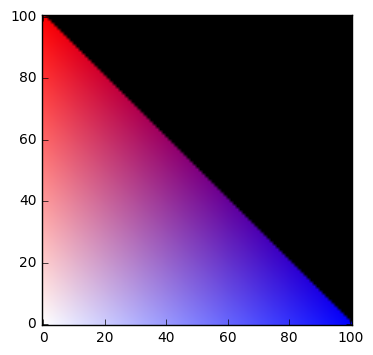

In [43]:
import itertools as itools

cmaps = []
def gen_cmap4(coords, values):
    for indices in itools.combinations(range(len(coords)), 3):
        cmaps.append(gen_cmap([coords[i] for i in indices], [values[i] for i in indices]))
    def cmap(point):
        outs = []
        for cmap in cmaps:
            res = cmap(point)
            if res is not None:
                outs.append(res)
#         print(outs)
        return np.mean(outs,axis=0)
    return cmap

def gen_cmap5(coords, values):
    max_dist = math.sqrt(2*100**2)
    def cmap(ps):
        if len(np.array(ps).shape) == 1:
            ps = [ps]
        distances = [[max(max_dist-la.norm(np.array(p)-np.array(c)), 0) for c in coords] for p in ps]
        norm_dist = [np.array(k)/sum(k) for k in distances]
        out = np.dot(norm_dist, values).clip(min=0.0, max=1.0)
#         print(ps, nps.tolist(), distances, out)
        return out.tolist()[0]
    return cmap

# cmap = gen_cmap4([[10,0], [100,0], [100,100], [10,100]], [(0,0,0), (0,0,1), (1,1,1), (1,0,0)])
# cmap = gen_cmap4([[47.5, 47.5], [95,0], [100,0], [0,100], [0,95]], [(1,1,1), (0,0.75,1), (0,0,1), (1,0,0), (1,0.75,0)])
cmap = gen_cmap4([[0,0], [100,0], [0,100]], [(1,1,1), (0,0,1), (1,0,0)])
# cmap = gen_cmap4([[50*(x+1) for x in p] for p in poly_corners(5)], [(0,0,0), (0,0,1), (1,0,0), (0,1,0), (1,1,1)])
#cmap = gen_cmap4([[50*(x+1) for x in p] for p in poly_corners(6)], [(0,0,1), (0,1,1), (0,1,0), (1,1,0), (1,0,0), (1,0,1)])

print(cmap((0,8)))

# print([x for x in itools.combinations(range(4),3)])
plot_cmap(cmap, filter= lambda x,y:x+y<=100, foo=1)
# for cmap in cmaps:
#     plot_cmap(cmap, filter= lambda x,y:True, foo=4)

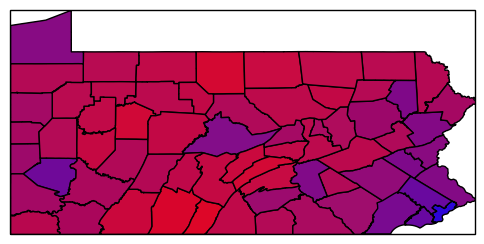

In [45]:
ax = plt.axes(projection=ccrs.PlateCarree())


# fig = plt.figure()#figsize=(8, 3))
# ax = fig.add_axes([0.05, 0.05, 0.85, 0.9], projection=ccrs.PlateCarree())
# ax2 = fig.add_axes([0.925, 0.15, 0.05, 0.7])

# ax = plt.axes(projection=ccrs.PlateCarree())
colormap = cm.get_cmap("Blues")
colormap.set_bad('orange')
colormap.set_over('g')
colormap.set_under('k')

# cmap = gen_cmap([[0,0], [100,0], [0,100]], [(0.5,0,0.5), (0,0,1), (1,0,0)])
# cmap = gen_cmap([[0,0], [100,0], [0,100]], [(0.5,0,0.5), (0,0,1), (1,0,0)])
# cmap = gen_cmap([[95,0], [100,0], [0,100], [0,95]], [(0,0,1), (0,0,1), (1,0,0), (1,0,0)])

# values = []
# for county,v in COUNTY_RESULTS.items():
#     meta = dict(COUNTY_RESULTS[k])
#     del meta["County"]
#     total = sum([int(f) for f in meta.values()])
#     vap = int(dict(VOTERS[k])["ALL"])
#     value = int(meta["TRUMP, DONALD J"])/sum([int(VOTERS[k]["REP"]), int(VOTERS[k]["OTH"]), int(VOTERS[k]["NOF"])])

for k,v in COUNTY_SHAPES.items():
    meta = dict(COUNTY_RESULTS[k])
    del meta["County"]
    total = sum([int(f) for f in meta.values()])
    clinton = int(meta["CLINTON, HILLARY"])
    trump = int(meta["TRUMP, DONALD J"])
    point = [clinton/total*100, trump/total*100]
    (x,y) = point
    if 95>x+y:
        print (k, x,y)
    color = cmap(point)
    cf = cfeature.ShapelyFeature([v], ccrs.PlateCarree())
    ax.add_feature(cf, facecolor=color)

ax.set_extent([-80.5198510000000027,-74.7215190000000007,39.7211469999999949,42.5160720000000012])
ax.set_aspect(1)

# cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=colormap, norm=colors.Normalize(vmin=0, vmax=1), extend='max')

plt.show()

In [409]:
PAPER = 0
MIXED = 1
DRE = 2

VOTE_METHOD = {
"Adams": PAPER,
"Allegheny": DRE,
"Armstrong": DRE,
"Beaver": DRE,
"Bedford": MIXED,
"Berks": DRE,
"Blair": DRE,
"Bradford": DRE,
"Bucks": DRE,
"Butler": DRE,
"Cambria": DRE,
"Cameron": DRE,
"Carbon": DRE,
"Centre": PAPER,
"Chester": MIXED,
"Clarion": DRE,
"Clearfield": DRE,
"Clinton": DRE,
"Columbia": MIXED,
"Crawford": DRE,
"Cumberland": MIXED,
"Dauphin": DRE,
"Delaware": DRE,
"Elk": DRE,
"Erie": DRE,
"Fayette": MIXED,
"Forest": DRE,
"Franklin": PAPER,
"Fulton": PAPER,
"Greene": DRE,
"Huntingdon": PAPER,
"Indiana": PAPER,
"Jefferson": DRE,
"Juniata": PAPER,
"Lackawanna": PAPER,
"Lancaster": MIXED,
"Lawrence": DRE,
"Lebanon": DRE,
"Lehigh": DRE,
"Luzerne": MIXED,
"Lycoming": DRE,
"Mckean": DRE,
"Mercer": DRE,
"Mifflin": PAPER,
"Monroe": DRE,
"Montgomery": DRE,
"Montour": PAPER,
"Northampton": DRE,
"Northumberland": DRE,
"Perry": DRE,
"Philadelphia": DRE,
"Pike": DRE,
"Potter": DRE,
"Schuylkill": DRE,
"Snyder": PAPER,
"Somerset": DRE,
"Sullivan": DRE,
"Susquehanna": PAPER,
"Tioga": DRE,
"Union": DRE,
"Venango": DRE,
"Warren": DRE,
"Washington": DRE,
"Wayne": PAPER,
"Westmoreland": MIXED,
"Wyoming": DRE,
"York": DRE
}

-2.45373136105


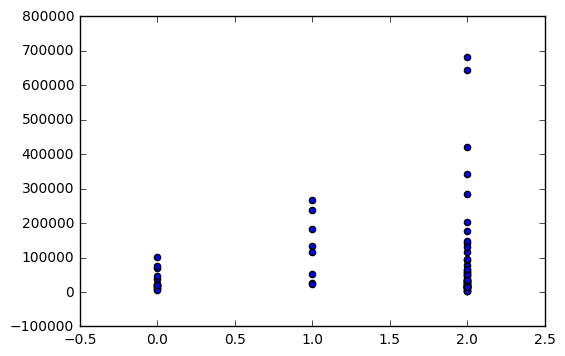

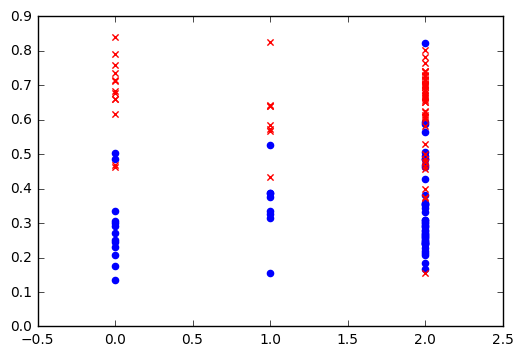

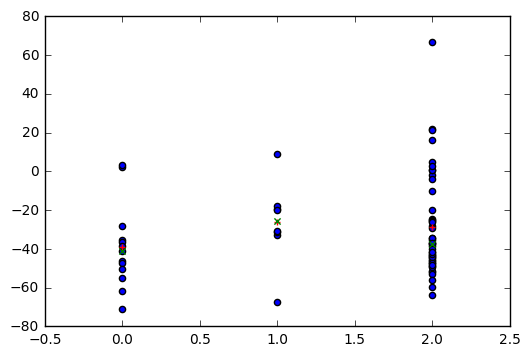

In [429]:
counties = VOTE_METHOD.keys()
x = [VOTE_METHOD[c] for c in counties]
totals = []
clinton = []
trump = []
delta = []
for c in counties:
    meta = dict(COUNTY_RESULTS[c])
    del meta["County"]
    total = sum([int(f) for f in meta.values()])
    totals.append(total)
    clinton.append(int(meta[CLINTON])/total)
    trump.append(int(meta[TRUMP])/total)
    delta.append((clinton[-1]-trump[-1])*100)
plt.figure()
plt.scatter(x,y)
plt.figure()
plt.scatter(x,clinton, color='blue')
plt.scatter(x,trump, color='red', marker='x')
plt.figure()
plt.scatter(x,delta)
d = np.array(delta)
k = np.array(x)

means_x = list(set(x))
means = [stat.mean(d[k==i]) for i in means_x]
medians = [stat.median(d[k==i]) for i in means_x]
plt.scatter(means_x, means, marker='+', color='red')
plt.scatter(means_x, medians, marker='x', color='green')
print(means[2]-means[1])
plt.show()

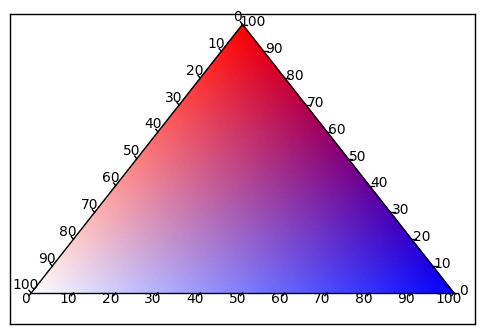

In [471]:
scale=100

data = dict()
for (i, j, k) in simplex_iterator(scale):
    data[(i, j, k)] = cmap((i,j))

figure, tax = ternary.figure(scale=scale)
tax.heatmap(data, style="triangular", colormap=False) # Allow colors as rgba tuples
tax.boundary()

tax.ticks(axis='lbr', multiple=10, linewidth=1)
# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

plt.show()